In [13]:
import sys
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import activations
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from generation_model import create_model

In [22]:
labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "O", "P", "Q",
          "R", "S", "T", "U", "V", "W", "X", "Y"]

In [14]:
X = (np.load('./dataset/data.npy', allow_pickle=True)).reshape(14472, 630)
X = X[:,:, np.newaxis]

y = []
for i in range(24):
  y = y + [i]*603
y = np.array(y)
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3333)
X_train, X_val, y_train, y_val =  train_test_split(X_train, y_train, test_size=0.1429)

In [15]:
model = create_model()

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              646144    
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 24)               

In [18]:
epoch = 15
batch_size = 64
model.fit(x = X_train, y = y_train, batch_size = batch_size, epochs = epoch, validation_data = (X_val, y_val))

Epoch 1/15
130/130 [==============================] - 1s 9ms/step - loss: 0.1875 - accuracy: 0.9371 - val_loss: 0.0977 - val_accuracy: 0.9826
Epoch 2/15
130/130 [==============================] - 1s 9ms/step - loss: 0.1483 - accuracy: 0.9497 - val_loss: 0.0711 - val_accuracy: 0.9833
Epoch 3/15
130/130 [==============================] - 1s 9ms/step - loss: 0.1566 - accuracy: 0.9433 - val_loss: 0.1351 - val_accuracy: 0.9478
Epoch 4/15
130/130 [==============================] - 1s 9ms/step - loss: 0.1575 - accuracy: 0.9444 - val_loss: 0.1130 - val_accuracy: 0.9536
Epoch 5/15
130/130 [==============================] - 1s 9ms/step - loss: 0.1446 - accuracy: 0.9469 - val_loss: 0.0818 - val_accuracy: 0.9666
Epoch 6/15
130/130 [==============================] - 1s 9ms/step - loss: 0.1286 - accuracy: 0.9572 - val_loss: 0.0622 - val_accuracy: 0.9840
Epoch 7/15
130/130 [==============================] - 1s 9ms/step - loss: 0.1156 - accuracy: 0.9583 - val_loss: 0.0372 - val_accuracy: 0.9891
Epoch 

In [20]:
y_pre = model.predict(X_test)

_y_pre = np.argmax(y_pre, axis = 1)
_y_test = np.argmax(y_test, axis = 1)

151/151 [==============================] - 1s 3ms/step


In [21]:
print("acc:", accuracy_score(_y_pre, _y_test))
print("f1:", f1_score(_y_pre, _y_test, average='macro'))

acc: 0.9809286898839138
f1: 0.9808828493080736


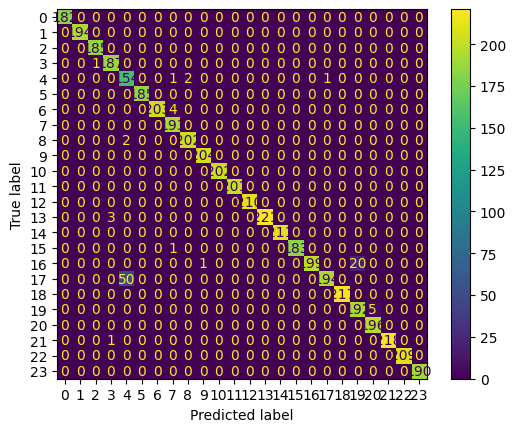

In [23]:
cm = confusion_matrix(_y_pre, _y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [25]:
print(labels[17])
print(labels[4])

S
E


In [ ]:
model.save_weights(".\weights\weights_ANN.h5")